In [4]:
import  pandas as pd
import numpy as np

In [5]:
np.set_printoptions(precision=4,linewidth=100)

In [6]:
mba_salary_df = pd.read_csv('Data/MBA Salary.csv')


In [7]:
mba_salary_df.head(10)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [8]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
S. No.                    50 non-null int64
Percentage in Grade 10    50 non-null float64
Salary                    50 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


# create X and Y sets


In [9]:
import statsmodels.api as sm


In [10]:
X = sm.add_constant(mba_salary_df['Percentage in Grade 10'])


C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
print(X)

    const  Percentage in Grade 10
0     1.0                   62.00
1     1.0                   76.33
2     1.0                   72.00
3     1.0                   60.00
4     1.0                   61.00
5     1.0                   55.00
6     1.0                   70.00
7     1.0                   68.00
8     1.0                   82.80
9     1.0                   59.00
10    1.0                   58.00
11    1.0                   60.00
12    1.0                   66.00
13    1.0                   83.00
14    1.0                   68.00
15    1.0                   37.33
16    1.0                   79.00
17    1.0                   68.40
18    1.0                   70.00
19    1.0                   59.00
20    1.0                   63.00
21    1.0                   50.00
22    1.0                   69.00
23    1.0                   52.00
24    1.0                   49.00
25    1.0                   64.60
26    1.0                   50.00
27    1.0                   74.00
28    1.0     

In [12]:
Y = mba_salary_df['Salary']

# Splitting data

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,train_size = 0.8, random_state =100)

# fitting the model

In [15]:
mba_salary_lm = sm.OLS(train_Y,train_X).fit()


In [16]:
print(mba_salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


# here you can  see R squared and p-value

In [17]:
mba_salary_lm.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2020-09-06 11:34      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

# residual analysis

# resid = observed minus fitted

In [18]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [19]:
mba_salary_resid =mba_salary_lm.resid 

In [20]:
probplot = sm.ProbPlot(mba_salary_resid)

In [21]:
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

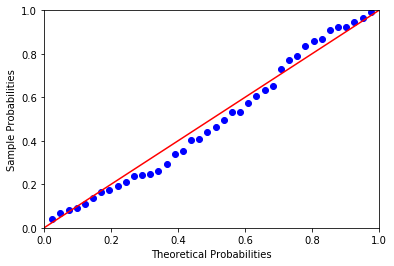

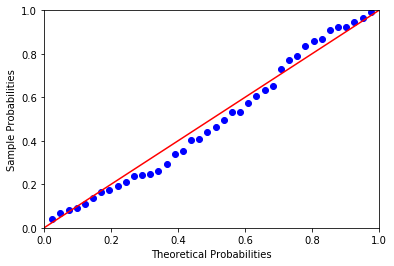

In [22]:
probplot.ppplot(line='45')

In [23]:
plt.show()

In [24]:
print(probplot)

In [25]:
def get_std_values(vals):
    return (vals-vals.mean())/vals.std()

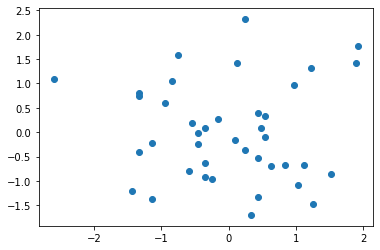

In [26]:
plt.scatter(get_std_values(mba_salary_lm.fittedvalues),get_std_values(mba_salary_resid))

# Zscore

In [27]:
from scipy.stats import zscore


In [28]:
mba_salary_df['zscore'] = zscore(mba_salary_df.Salary)

In [29]:
mba_salary_df[(mba_salary_df.zscore>3.0)|(mba_salary_df.zscore<-3.0)]

,S. No.,Percentage in Grade 10,Salary,zscore


# predict data

In [30]:
pred_y = mba_salary_lm.predict(test_X)

In [31]:
print(pred_y)

6     279828.402452
36    272707.227686
37    215737.829560
28    237101.353858
43    295851.045675
49    247070.998530
5     226419.591709
33    308313.101515
20    254904.290772
42    295494.986937
dtype: float64


In [32]:
from sklearn import metrics


In [36]:
np.abs(metrics.r2_score(test_Y,pred_y))

0.15664584974230378

In [46]:
r2_df = pd.DataFrame() 
r2_df['I'] = []
r2_df['r2'] = [] 
for i in range(1,101):
    train_x ,test_x,train_y,test_y = train_test_split(X,Y,train_size= 0.8,random_state =i)
    country_lm = sm.OLS(train_y,train_x).fit()
    r2_df.loc[i]=list([i,country_lm.rsquared])

In [51]:
r2_filter = r2_df[r2_df['r2']>0.2111]

In [52]:
print(r2_filter)

       I        r2
1    1.0  0.215208
31  31.0  0.212308
34  34.0  0.237340
55  55.0  0.224022
59  59.0  0.250397
67  67.0  0.238878
73  73.0  0.227585
87  87.0  0.220587
89  89.0  0.260125
93  93.0  0.212376
97  97.0  0.214349
